# Add confidence levels

## Step 1: Create an instance of `NixtlaClient`

In [ ]:
from nixtla import NixtlaClient


In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

In [ ]:
#| hide
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()
nixtla_client = NixtlaClient()

## Step 2: Load your dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/peyton_manning.csv')

## Step 3: Adjust confidence levels
By default, TimeGPT uses a confidence level of 99%. Any value that falls outside of this interval is considered an anomaly.

This is tweaked using the `level` argument. A lower value narrows the interval and more anomalies are detected. Larger values widen the interval and less anomalies are detected.

The `level` argument takes any values between 0 and 100, including decimal numbers.

In [ ]:
anomalies_df = nixtla_client.detect_anomalies(
    df, 
    time_col='timestamp', 
    target_col='value', 
    freq='D',
    level=70
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Anomaly Detector Endpoint...


## Step 4: Plot anomalies

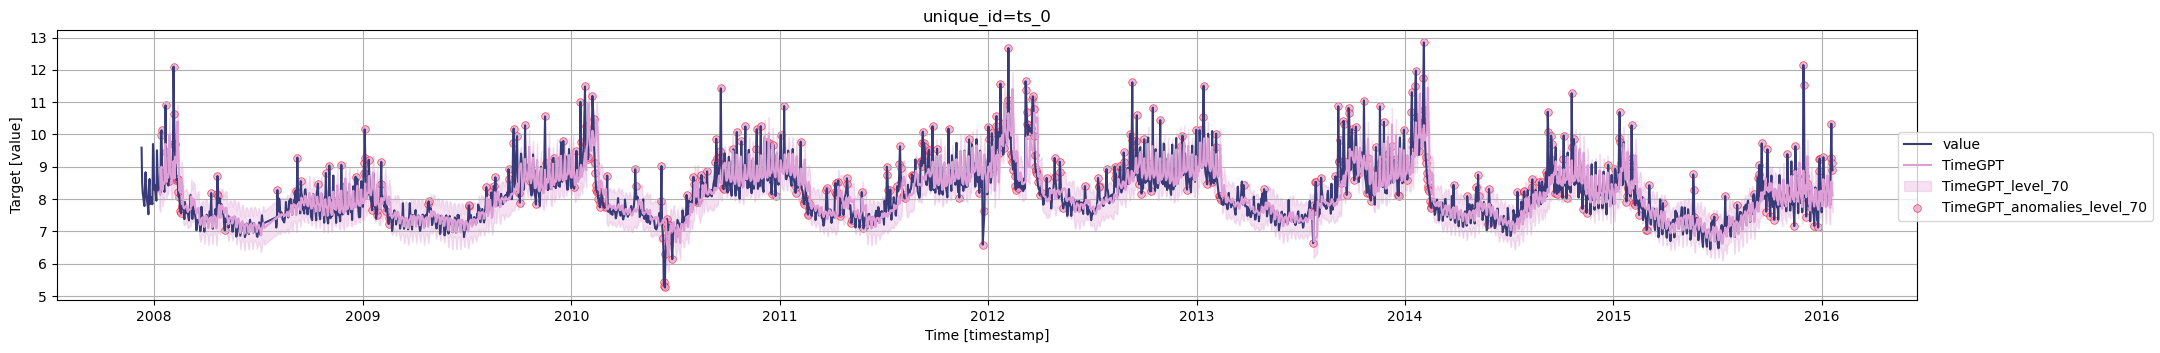

In [ ]:
nixtla_client.plot(
    df, 
    anomalies_df,
    time_col='timestamp', 
    target_col='value'
)